# What is Linear Regression?

## Introduction

### Linear Regression is one of the simplest and most commonly used machine learning algorithms. It is used to model the relationship between a dependents variable (target) and one or more independent variables (predictors). The goal of linear regression is to find a straight line that best fits the data, which allows for a prediction to be made based on new input values.

### This algorithm is widely used in finance, economics, and various fields where understanding trends and making forecasts are important.






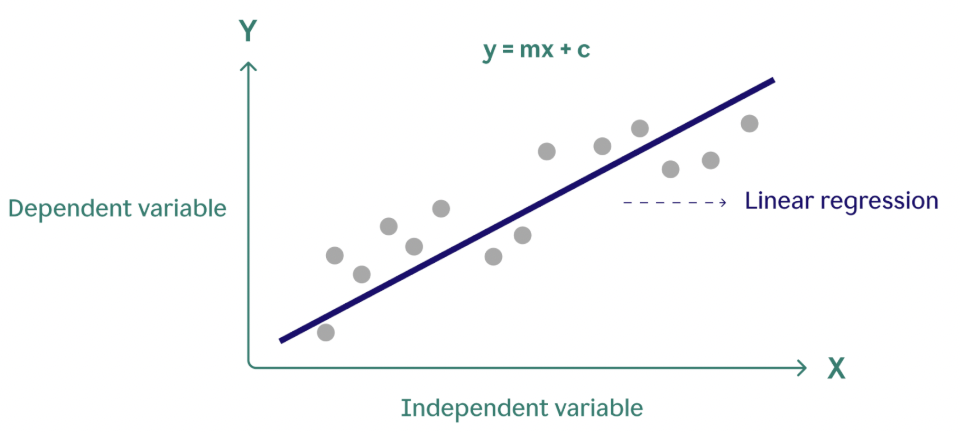

## How does Linear Regression work?

### Linear Regression works by establishing a linear relationship between the input (X) and output (Y) variables. It does this by fitting a straight line to the data points, which can be represented by the equation:

  Y = mX + b

  where:
*   Y is the predicted output
*   X is the input
*   m (or sometimes $β_1$) is the slope of the line
*   b (or sometimes $β_0$) is the intercept

### The algorithm finds the best values for m and b by minimizing the difference between the predicted and actual values.




## Types of Linear Regression

### There are two main types of linear regression:

*   Simple Linear Regression: involves one independent variable and one dependent variable
*   Multiple Linear Regression: uses two or more independent variables to predict the dependent variable

## Mathematical Representation

### Linear Regression aims to minimize the error between predicted and actual values. This error is measured using the Mean Squared Error (MSE):

  $MSE = \frac{1}{n} \sum_({Y_i} - \hat{Y_i})^2$

  where:
*   $Y_i$ is the actual value
*   $\hat{Y_i}$ is the predicted value
*   n is the total number of data points

### To optimize the model, techniques like Ordinary Least Squares (OLS) or Gradient Descent are used to adjust the slope (m) and intercept (b).

## Evaluating Model Performance

### To determine how well a linear regression model fits the data, you can use performance metrics such as:

*   R-squared ($R^2$): measures how much of a variance in the dependent variable is explained by the independent variable(s), this ranges from -1 to 1, where a value close to 1 indicates a strong, positive fit
*   Mean Squared Error (MSE): measures the average squared difference between predicted and actual values, where lower values indicate better performance
*   Mean Absolute Error (MAE): measures the average absolute difference between predicted and actual values

## Advantages and Limitations

### Advantages

*   Simple and easy to understand
*   Works well with small datasets
*   Provides interpretability, as coefficients show the impact of each independent variable

### Limitations

*   Assumes a linear relationship between variables, which might not always be true
*   Sensitive to outliers, which can affect predictions
*   Not suitable for complex, non-linear problems





# Linear Regression in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

filename = "/Users/maciek/Downloads/diabetes_dataset_with_notes.csv"

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_balanced, y_train_balanced)

y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Mean Squared Error: 0.05964115599717726
R-squared Score: 0.23438310613601654


#Visualizing Results

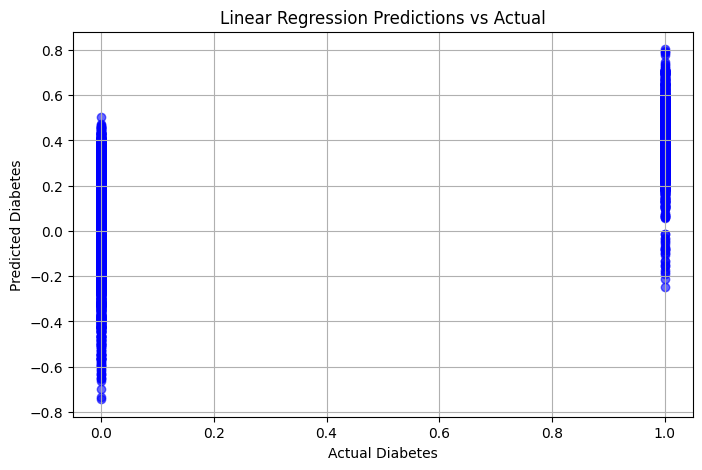

In [2]:
plt.figure(figsize = (8, 5))
plt.scatter(y_test, y_pred, alpha = 0.6, color = 'blue')
plt.xlabel('Actual Diabetes')
plt.ylabel('Predicted Diabetes')
plt.title('Linear Regression Predictions vs Actual')
plt.grid(True)
plt.show()

*   Each dot shows a person's actual diabetes value (either 0 = no diabetes or 1 = has diabetes) compared to what the model predicted.
*   The model's predictions are spread out and don't line up well with the actual values.
*   Ideally, we'd want the dots to form two tight groups near 0 and 1 - but here they're scattered.

###The model isn't very good at predicting whether someone has diabetes - it struggles to tell the difference between people who do and don't have it.


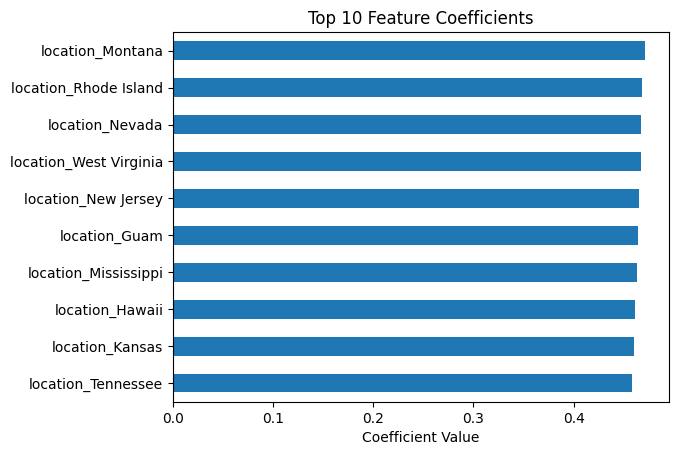

In [3]:
coef_series = pd.Series(lr.coef_, index = X.columns)
coef_series.nlargest(10).plot(kind = 'barh', title = "Top 10 Feature Coefficients")
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

*   All top featuers are locations (Tennessee, Kansas, etc)
*   These states had the biggest weights, meaning the model used them most when predicting diabetes

###According to this model, where someone lives had the strongest influence on predicted diabetes - more than personal health or habits.
